# Importuję dwie biblioteki:
* **numpy** do funkcji matematycznych i liczb losowych
* **matplotlib.pyplot** do wykresów


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Poniżej zaprezentuję przykład działania Monte Carlo
Zrobimy to na przykładzie całki, jako pole wykresem funkcji $f(x) = \sin^2(\pi x)$

In [2]:
def funkcja(x):
    ret = np.sin(np.pi * x)
    ret = ret*ret
    return ret

# u nas N będzie oznaczać liczbę powtórzeń - liczbę symulacji MC
N = 10**4

# losuję współrzędne $N$ punktów
# funkcja np.random.rand zwraca liczbę losową z rozkładnu jednostajnego [0,1]
x_MC = np.random.rand(N)
y_MC = np.random.rand(N)

# sprawdzam które z nich leżą pod wykresem funkcji f(x)
punkty_pod_wykresem = funkcja(x_MC)>y_MC

# liczę pole jako stosunek liczby punktów (należy też przemnożyć przez pole czworokąta, ale u nas to kwadrat 1x1)
pole_pod_wykresem = punkty_pod_wykresem.sum()/N


print(f'Pole pod wykresem analitycznie {0.5} vs Monte Carlo {pole_pod_wykresem}')

Pole pod wykresem analitycznie 0.5 vs Monte Carlo 0.5046


## Żeby zaprezentować działanie Monte Carlo, zrobimy jeszcze wykres funkcji, oraz zaznaczymy punkty pod wykresem funkcji

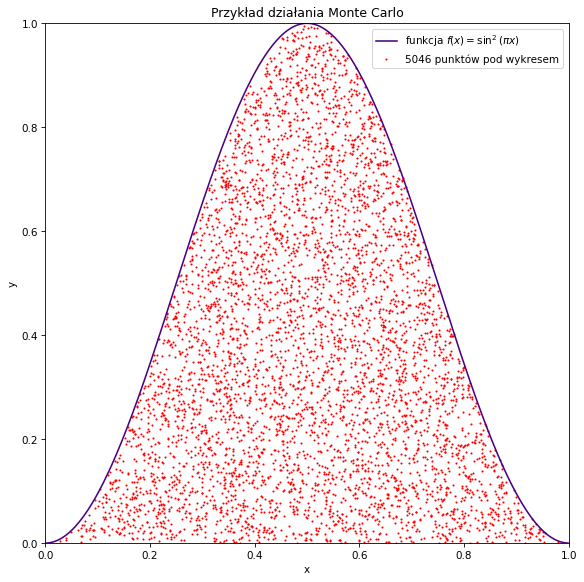

In [3]:
fig, ax = plt.subplots(figsize=(9,9), dpi=75)

# robię tablicę x z wartościami {0, 1/1000, 2/1000, ..., 998/1000, 999/1000}
# oraz liczę y dla tych punktów - narysuję w ten sposób funkcję
x = np.arange(0, 1, 1/1000)
y = funkcja(x)

# rysuję punkty z funkcji - funkcja plot łączy je linią
ax.plot(x,y, color='indigo', label=r'funkcja $f(x)=\sin^2{(\pi x)}$')

# a tutaj rysuję punkty pod wykresem - funkcja scatter NIE łączy je linią, w przeciwieństwie do funkcji plot
ax.scatter(x_MC[punkty_pod_wykresem], y_MC[punkty_pod_wykresem], color='red', s=1, label=f'{punkty_pod_wykresem.sum()} punktów pod wykresem')

# upiększanie wykresu - ustawiam granice x oraz y na wykresie
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_title('Przykład działania Monte Carlo')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()